In [39]:
#imports
import scipy as sp
import math
import numpy as np

import pprint  as pp
import matplotlib.pyplot as plt
from functools import partial
from ipywidgets import interact


In [46]:
#cts
m_scale = 1
cg_na   = 74   * m_scale * 10**-3
cg_l    = 19   * m_scale * 10**-3
cE_na   = 60   * m_scale
cE_l    = -67  * m_scale
cC_m    = 0.01 * m_scale * 10**-3
cV_h    = 1.5  * m_scale
ck      = 16   * m_scale

# mS * mV  /mF 
# mF > mC/V | 
#  
# mS*mV+mA/mF -> mA /mF  -> V*mA / mC -> mV / s

In [47]:
def pv(v):
    return 1/( 1 + math.exp( (cV_h-v)/ck) )

def dV(v,I):
    return - (cg_na*pv(v)*(v-cE_na) + cg_l*(v-cE_l) - I) / cC_m 
# 

def dV_ivp(v,t):
    return - (cg_na*pv(v)*(v-cE_na) + cg_l*(v-cE_l) ) / cC_m 

def dV_ivp2(t,v):
    return - (cg_na*pv(v)*(v-cE_na) + cg_l*(v-cE_l) ) / cC_m 

def dV_ivp3(t,v,I):
    return - (cg_na*pv(v)*(v-cE_na) + cg_l*(v-cE_l) - I(t) ) / cC_m 

dV0 = partial (dV,I=0)


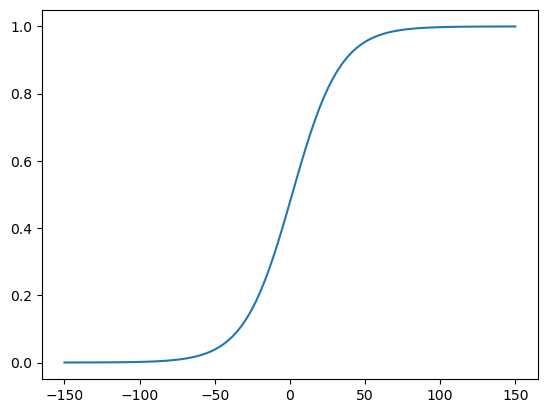

In [43]:
#plot Pv
m_DomPv = 150
m_samplesPv = 100
plDomPv = np.linspace(-m_DomPv , m_DomPv , m_samplesPv)
plt.plot(plDomPv,list(map(lambda x : pv(x) ,plDomPv)))

In [44]:
#finding roots of dV/dt with I = 0

seeds = np.linspace(-100,100,4)
r_dV0 = partial (sp.optimize.fsolve, dV0)
print (*zip( seeds, map( lambda x : r_dV0(x)[0] , seeds ) ) ) #make it pretty. ..

(-100.0, -52.5123214621681) (-33.33333333333333, -40.28545968005548) (33.33333333333334, 30.863151969542628) (100.0, 30.863151969543203)


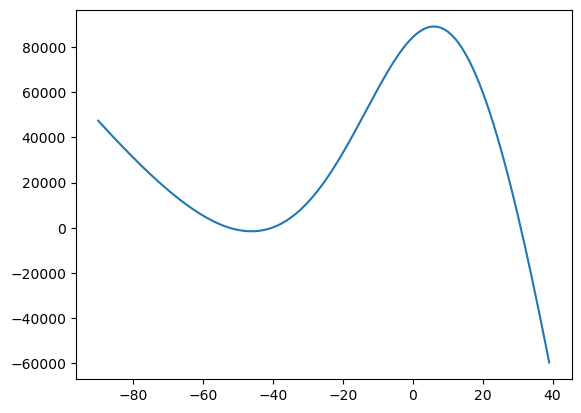

In [45]:
#plot dV I=0 #algo con la escala no cuadra parece q bota el resultado en micro?voltios
m_DomdVI0M = 40
m_DomdVI0m = -90
m_stepdVI0 = 0.5
plDomdVI0 = np.arange(m_DomdVI0m , m_DomdVI0M , 1)

plt.plot(plDomdVI0,list(map(dV0,plDomdVI0)))

In [48]:
m_p3_xm     = -90
m_p3_xM     = 150
m_p3_step   = 0.5
m_p3_x = np.arange(m_p3_xm,m_p3_xM,m_p3_step)

def plotF1(Ix):
    plt.axhline(y=0) 
    plt.plot( m_p3_x , list(
            map( partial(dV,I=Ix) , m_p3_x ) ) )
interact ( 
    plotF1,
    Ix = (-1.0,7.0 ) )



interactive(children=(FloatSlider(value=3.0, description='Ix', max=7.0, min=-1.0), Output()), _dom_classes=('w…

<function __main__.plotF1(Ix)>

In [79]:
def plotF2(v_in):
    xm = 0
    xM = .03
    lsp = np.linspace(xm,xM,300)
    l_in = np.linspace(-100,0,200)
    t = (xm,xM)
    #sp.integrate.odeint(dV0, v_in,v_t)
    sol = sp.integrate.solve_ivp(dV_ivp2 , t , [v_in] , dense_output=True, method='LSODA')
    print(sol)#, sol.t , sep='\n__\n')
    plt.plot(sol.t,sol.y[0])
    #plt.plot(sol.t, sol.sol(t))
        #plotF2

interact(   plotF2
            , v_in=(-120.0,20.0))

interactive(children=(FloatSlider(value=-50.0, description='v_in', max=20.0, min=-120.0), Output()), _dom_clas…

<function __main__.plotF2(v_in)>

In [58]:
def plotF3(v_in):
    xm = 0
    xM = .5

    lsp = np.linspace(xm,xM,150)
    l_in = np.linspace(0,150,200)
    t = [xm,xM]
    sol = sp.integrate.odeint(dV_ivp, v_in, lsp )
    #sol = sp.integrate.solve_ivp(dV_ivp , t , [v_in]) 
    print(*sol)
    plt.plot(lsp,sol)
        #plotF2

interact(   plotF3
            , v_in=(-120.0,20.0))

interactive(children=(FloatSlider(value=-50.0, description='v_in', max=20.0, min=-120.0), Output()), _dom_clas…

<function __main__.plotF3(v_in)>

In [83]:
#bono  I_in
f = 0.50
IMx = 1

def funcGen_I( f , vM ):
    return lambda t : (vM*np.sin(t*f)**4)
    
    #return lambda x : (   (np.exp(a*np.sin(b*x)**2)) **-1  )

linS = np.linspace(0,5,150)
#plt.plot( linS , f_I1( linS ) )


def plotF4(v_in, f, IMx):
    xm = 0
    xM = 1
    
    f_I1 = funcGen_I(f,IMx)
    par = tuple([f_I1])

    lsp = np.linspace(xm,xM,300)
    l_in = np.linspace(-100,0,200)
    t = (xm,xM)
    sol = sp.integrate.odeint(dV_ivp3 , [v_in] , lsp , par,  tfirst=True)
    plt.plot(lsp,f_I1(lsp))
    plt.plot(lsp,sol[:,0] )
    

interact(   plotF4, 
            v_in=(-120.0,20.0),
            f=(0,10.0),
            IMx=(-1.0,1.0)
            )



interactive(children=(FloatSlider(value=-50.0, description='v_in', max=20.0, min=-120.0), FloatSlider(value=5.…

<function __main__.plotF4(v_in, f, IMx)>

In [103]:
@interact(
    a=(0,100.0),
    b=(0,100.0))
def plot(a,b): #a,b>0
    D = np.linspace(-1,1,200)
    plt.plot(D ,(lambda x : np.arctan(np.exp(10*x)))(D))
    plt.plot(D ,(lambda x : (   (np.exp(10*np.sin(10*x)**2)) **-1  ))(D))
    plt.plot(D ,(lambda x : (   (np.exp(a*np.sin(b*x)**2)) **-1  ))(D))
    


interactive(children=(FloatSlider(value=50.0, description='a'), FloatSlider(value=50.0, description='b'), Outp…